In [3]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(category=FutureWarning, action="ignore") # Denna hindrar vissa varningar för att visas.

C:\Users\danie\AppData\Local\Temp\ipykernel_3596\3257387896.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
skolk = pd.DataFrame({'col1': [23, 45, 65, 32, 12, 30, 18]})

Medelvärdet

In [5]:
skolk['col1'].mean() # pandas för att beräkna medelvärdet

32.142857142857146

In [6]:
np.mean(skolk) # numpy för att beräkna medelvärdet

32.142857142857146

In [7]:
np.mean(skolk['col1']) # numpy för att beräkna medelvärdet, men man anger även kolumnens namn för tydlighets skull, eller om det finns flera kolumner.

32.142857142857146

Stickprovsstandardavvikelse

In [8]:
skolk['col1'].std()

17.976174708286997

In [9]:
np.std(skolk, ddof=1) # numpy för att beräkna stickprovsstandardavvikelsen. Ange ddof=1 för att få 'n-1'.

col1    17.976175
dtype: float64

### Scipy



In [10]:
from scipy.stats import norm #importerar normalfördelningen

### Cumulative Distribution Function, cdf()
- Beräknar den kumulativa sannolikheten i en given punkt, givet x-värde, medelvärde och standardavvikelse.
- Input argument:
    - x = x-värde/-n
    - loc = medelvärde
    - scale = standardavvikelse
- returnerar: kumulativa sannolikheten för angivet x-värde.

P(X $\leq$ x) = F(x).</li>

In [11]:
x = np.linspace(-5, 5, 1000) # skapart en x-axel
y_cdf = norm.cdf(x=x, loc=0, scale=1)

### Percentile Point Function, ppf()
- .ppf() tar in en sannolikhet mellan 0 och 1, tex 0.975 och returnerar x-värdet, för en normalfördelning där man anger medelvärde och standardavvikelse.
- Input argument:
    - loc = medelvärde
    - scale = standardavvikelse
    - q = sannolikhet, 0-1
- ruturnerar: x-värdet för den angivna sannolikheten.

In [12]:
q = np.array([0.0013, 0.0228, 0.1587, 0.5, 0.8413, 0.95, 0.975])
y_ppf = norm.ppf(loc=10, scale=1, q=q)
print(y_ppf)

[ 6.98854624  8.00092279  9.00018491 10.         10.99981509 11.64485363
 11.95996398]


### Probability Density Function, pdf()
- Beräknar täthetsfunktionen i en given punkt.</li>
- pdf(x, loc, scale), x=x-värdena som en np-array, loc=mitten, scale=standardavvikelse
- funktionen beräknar så att säga y-värdena

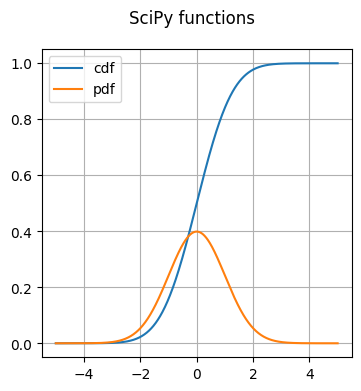

In [13]:
y_pdf = norm.pdf(x=x, loc=0, scale=1)
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(4)
fig.suptitle('SciPy functions')
ax.plot(x, y_cdf, label='cdf')
ax.plot(x, y_pdf, label='pdf')
ax.legend()
ax.grid()
#scipy.stats.norm.cdf()

, ppf()
- 

### Probability Mass Function, pmf()
- För diskreta fördelningar endast. (Motsvarar pdf för kontinuerliga fördelningar.)
- Beräknar sannolikheten P(X=x).

P(X=x) = F(x).</li>


In [14]:
from scipy.stats import binom # importerar binomialfördelningen
n = 30
p = 0.1
result = binom.pmf(k=2, n=n, p=p)
print(result)

0.22765622036690183


<BarContainer object of 11 artists>

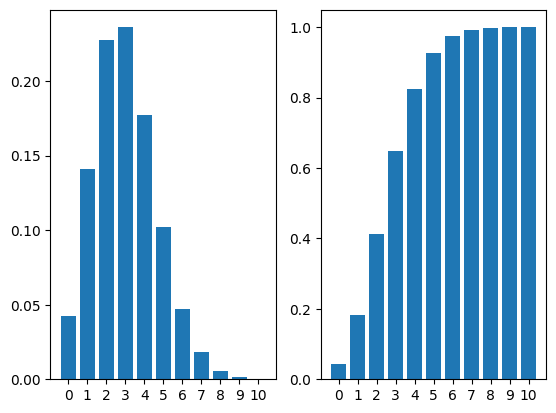

In [15]:
k_array =  np.linspace(0,10, 11)
binom_pmf = binom.pmf(k=k_array, n=n, p=p)
binom_cdf = binom.cdf(k=k_array, n=n, p=p)
fig, ax = plt.subplots(1,2, sharex=True)
plt.xticks(range(len(k_array)))
ax[0].bar(x=k_array, height=binom_pmf)
ax[1].bar(x=k_array, height=binom_cdf)

### Interval()
- Beräknar ett konfidensintervall, kommer mest användas med normal- och t-fördelningen.

## Övningstenta 1:

3c. Värdet på 𝑧 som tillfredsställer uttrycket 𝑃(𝑍≤𝑧)=0.025. Utgå från standardnormalfördelningen. (2p)

In [17]:
scs.norm.ppf(0.025)
# Förklaring: vi känner till sannolikheten och söker värdet på x-axeln i en normalfördelning.
# Då använder man "percent point function", ppf. Den är inversen av cdf, cumulative distribution function"
# Eftersom det är standard normafördelning så behöver vi inte ange medelvärde eller std.

-1.9599639845400545

3d. Låt X vara en normalfördelad slumpvariabel, med ett medelvärde på 12, och en standardavvikelse på 2. Uttryck sannolikheten att X antar värden mindre än 10, samt skriv en kodrad i SciPy för att beräkna sannolikheten. Antag att du redan importerat alla de fördelningar vi talat om i kursen. Inget uträknat svar krävs (2p)

In [16]:
scs.norm.cdf(x=10, loc=12, scale=2)
# Förklaring: vi känner till x-värdet, medelvärdet och std. För att beräkna sannolikheten, använd cumulative distribution function, cdf.

0.15865525393145707

3e. Du arbetar med att sälja plastlådor, och vet att det är 50% sannolikhet att du når försäljningsmålet och säljer fler än 12 lådor per dag. Nu vill du beräkna sannolikheten att du uppnår den försäljningen 4 dagar på en vecka. Låt X vara en slumpvariabel som räknar antalet dagar i veckan där du uppnår försäljningsmålet (Räkna på 7 dagar i en vecka). Skriv ett utttryck för ovanstående sannolikhet, samt skriv en kodrad för att beräkna den med hjälp av SciPy. Antag att du redan importerat alla de fördelningar vi talat om i kursen. Inget uträknat svar krävs. (3p)

In [19]:
scs.binom.pmf(k=4, n=7, p=0.5)
# Förklaring: det är en binomialfördelning, men sannolikheten 0.5 och antalet dagar = 7. Beräkna P(X=4).
# Eftersom det är en diskret fördelning ska man använda probability mass function.

0.27343749999999983

## Övningstenta 2:

3c. Rektorn antar att skolkandet är en normalfördelad slumpvariabel 𝑋, med ett medelvärde på 67, och en standardavvikelse på 36. Uttryck sannolikheten att skolkandet en given månad är högre än 75 timmar, samt skriv en kodrad i SciPy som beräknar den. Antag att du redan importerat alla de fördelningar vi talat om i kursen under deras respektive fördelningsnamn. Inget uträknat svar krävs. (3p)

In [22]:
1 - scs.norm.cdf(x=75, loc=67, scale=36)
# förklaring: använder cumulative distribution function. Den beräknar sannolikheten när vi har ett x-värde och information om medelvärde och standardavvikelse.

0.4120704478709426

3d. Enligt en annan del av undersökningen visar det sig att i medeltal 32 studenter skolkar varje månad. Låt X vara en slumpvariabel som räknar hur många studenter som skolkar en given månad. Uttryck sannolikheten att högst 30 studenter skolkar en given månad, samt skriv en kodrad i SciPy som beräknar den. Antag att du redan importerat alla de fördelningar vi talat om i kursen under deras respektive fördelningsnamn. Inget uträknat svar krävs. (3p)

In [26]:
scs.poisson.cdf(30, 32)
# förklaring: man antar att varje elev har sammma sannolikhet att skolka, samt det är tidsbegränsat => poisson fördelat.
# Använder cumulative distribution function, med värdet 30 samt väntevärdet 32.

0.4061480181077554

## Lite blandat

Geometriska fördelningen.

In [29]:
from scipy.stats import geom # Importera geometriska fördelningen med SciPy

# Exempel från boken sidan 97: vad är sannolikheten att man klarar tentan på försök 3 om sannolikheten att klara tentan är 0.3, dvs P(X=3)?
scs.geom.pmf(k=3, p=0.3)

0.14699999999999996